In [ ]:
#Importing Essential Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#loading the dataset

In [2]:
df = pd.read_csv('admission_predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
#Exploring the dataset

In [3]:
df.shape

(500, 9)

In [4]:
df.size

4500

In [5]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [7]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [9]:
df.isnull().any()

Serial No.           False
GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

In [10]:
df.rename(columns={'GRE Score ': 'GRE','TOEFL Score':'TOEFL','Chance of Admit ':'Probability'},inplace=True)
df.head()

,Serial No.,GRE Score,TOEFL,University Rating,SOP,LOR,CGPA,Research,Probability
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [11]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL', 'University Rating', 'SOP', 'LOR ',
       'CGPA', 'Research', 'Probability'],
      dtype='object')

**Data Visualization

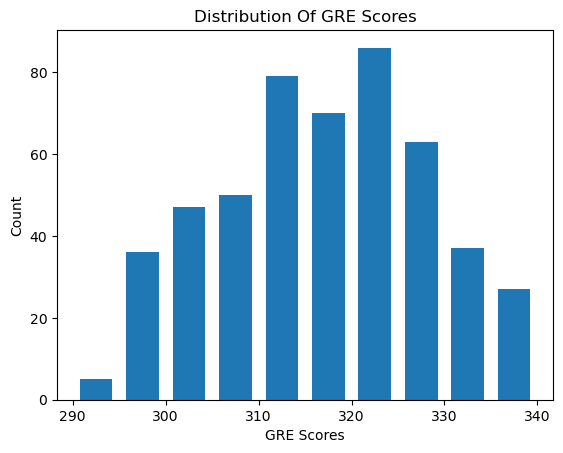

In [12]:
fig = plt.hist(df['GRE Score'],rwidth=0.7)
plt.title('Distribution Of GRE Scores')
plt.xlabel('GRE Scores')
plt.ylabel('Count')
plt.show()

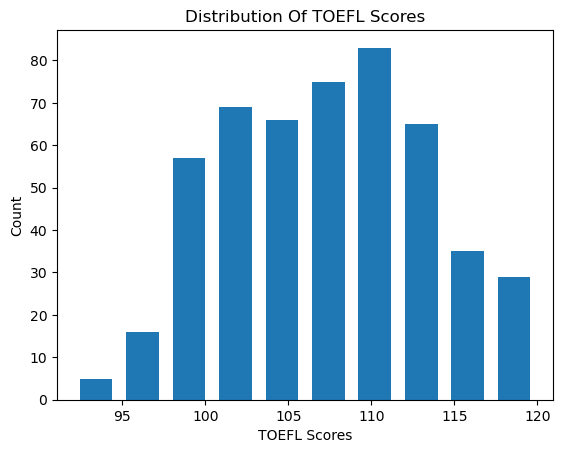

In [13]:
fig = plt.hist(df['TOEFL'],rwidth=0.7)
plt.title('Distribution Of TOEFL Scores')
plt.xlabel('TOEFL Scores')
plt.ylabel('Count')
plt.show()

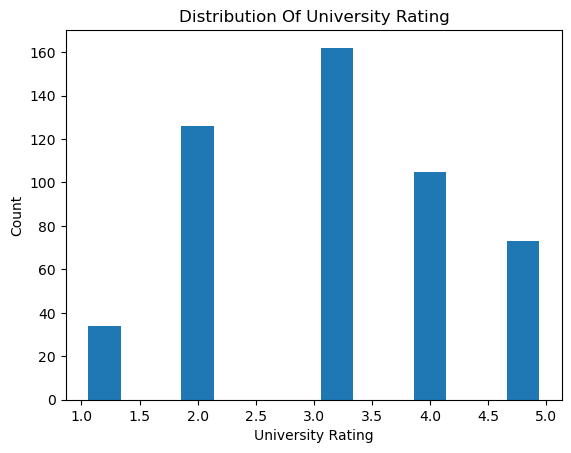

In [14]:
fig = plt.hist(df['University Rating'],rwidth=0.7)
plt.title('Distribution Of University Rating')
plt.xlabel('University Rating')
plt.ylabel('Count')
plt.show()

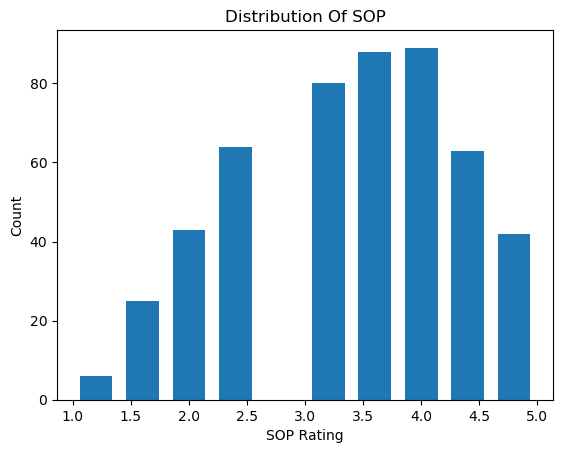

In [15]:
fig = plt.hist(df['SOP'],rwidth=0.7)
plt.title('Distribution Of SOP')
plt.xlabel('SOP Rating')
plt.ylabel('Count')
plt.show()

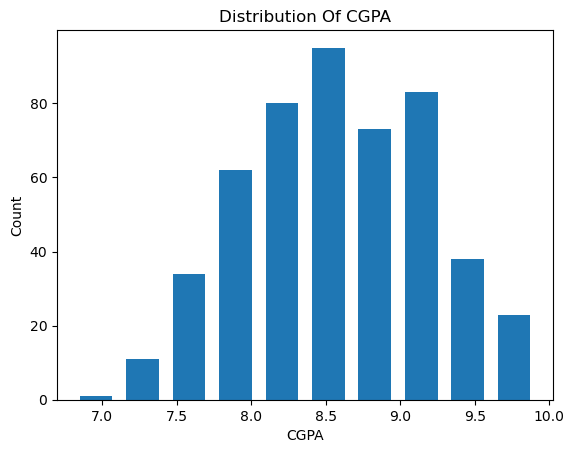

In [16]:
fig = plt.hist(df['CGPA'],rwidth=0.7)
plt.title('Distribution Of CGPA')
plt.xlabel('CGPA')
plt.ylabel('Count')
plt.show()

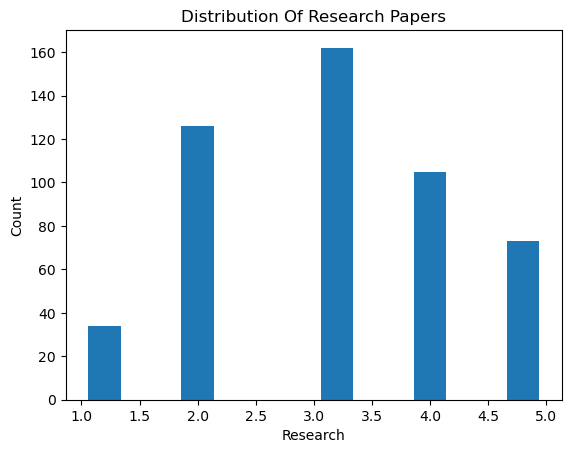

In [17]:
fig = plt.hist(df['University Rating'],rwidth=0.7)
plt.title('Distribution Of Research Papers')
plt.xlabel('Research')
plt.ylabel('Count')
plt.show()

**Data Cleaning

In [19]:
#Removing the serial no ,column
df.drop('Serial No.', axis='columns',inplace = True)
df.head()

,GRE Score,TOEFL,University Rating,SOP,LOR,CGPA,Research,Probability
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [20]:
#Replacing the 0 values from ['GRE','TOFEL','University Rating','SOP','LOR','CGPA'] by NaN

df_copy = df.copy(deep=True)
df_copy[['GRE Score','TOEFL','University Rating','SOP','CGPA']] = df_copy[['GRE Score','TOEFL','University Rating','SOP','CGPA']].replace(0,np.NaN)
df_copy.isnull().sum()

GRE Score            0
TOEFL                0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Probability          0
dtype: int64

In [ ]:
**Model Building 

In [21]:
#splitting the dataset in features and labels 

X = df_copy.drop('Probability',axis = 'columns')
y = df_copy['Probability']

In [ ]:
#using GridSearch CV to find the best algoritham for this problem 

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def find_best_model(X, y):
    models = {
        'linear_regression': {
            'model': Pipeline([
                ('scaler', StandardScaler()),  # Add scaling as a preprocessing step
                ('regressor', LinearRegression())
            ]),
            'parameters': {
                'regressor__fit_intercept': [True, False]  # Change parameter to use in pipeline
            }
        },
        'lasso': {
            'model': Lasso(),
            'parameters': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'svr': {
            'model': SVR(),
            'parameters': {
                'gamma': ['auto', 'scale']
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'parameters': {
                'criterion': ['squared_error'],  # Corrected value
                'n_estimators': [5, 10, 15, 20]
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'parameters': {
                'criterion': ['squared_error', 'friedman_mse'],  # Updated for consistency
                'splitter': ['best', 'random']
            }
        },
        'knn': {
            'model': KNeighborsRegressor(),
            'parameters': {
                'n_neighbors': [2, 5, 10, 20]
            }
        }
    }

    scores = []
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv=5, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
    
    return pd.DataFrame(scores, columns=['model', 'best_parameters', 'score'])

find_best_model(X, y)


,model,best_parameters,score
0,linear_regression,{'regressor__fit_intercept': True},0.810802
1,lasso,"{'alpha': 1, 'selection': 'random'}",0.215088
2,svr,{'gamma': 'scale'},0.654099
3,random_forest,"{'criterion': 'squared_error', 'n_estimators':...",0.769786
4,decision_tree,"{'criterion': 'friedman_mse', 'splitter': 'ran...",0.610760
5,knn,{'n_neighbors': 20},0.723017


**Since the Linear Regression Algoritham has the highest accuracy,
the model selected the moel selected for thi problem is Linear Regression

In [26]:
from sklearn.model_selection import cross_val_score

# Create a pipeline with scaling and the linear regression model
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalize the features
    ('regressor', LinearRegression())
])

# Use cross_val_score to evaluate the model
scores = cross_val_score(pipeline, X, y, cv=5)
print('Highest Accuracy: {:.3f}%'.format(scores.mean() * 100))

Highest Accuracy: 81.080%


In [27]:
# Splitting the dataset into train and test samples

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)
print(len(X_train),len(X_test))

400 100


In [28]:
from sklearn.model_selection import train_test_split

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with scaling and the linear regression model
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalize the features
    ('regressor', LinearRegression())
])

# Fit the model
pipeline.fit(X_train, y_train)

# Evaluate the model
score = pipeline.score(X_test, y_test)
print('Model Score: {:.3f}'.format(score))

Model Score: 0.819


**Predicting the values using our trained model

In [29]:
# Assuming you have already defined your pipeline and fitted it to the training data
# Create the prediction input-1

input_data = [[337, 1, 4, 4, 4.5, 9.65, 0]]

# Use the pipeline to predict

predicted_chance = pipeline.predict(input_data)[0] * 100

print('Chance of getting into UCLA is {:.3f}%'.format(predicted_chance))

Chance of getting into UCLA is 58.294%


In [30]:
# Assuming you have already defined your pipeline and fitted it to the training data
# Input in the form: GRE, TOEFL, University Rating, SOP, LOR, CGPA, Research

input_data = [[320, 1, 13, 2, 2.0, 8.64, 1]]  # Adjust the input to match the features used

# Use the pipeline to predict

predicted_chance = pipeline.predict(input_data)[0] * 100

print('Chance of getting into UCLA is {:.3f}%'.format(predicted_chance))

Chance of getting into UCLA is 42.833%
